<a href="https://colab.research.google.com/github/1Anvitha/PRA3024_25/blob/main/GW_tutorial_1_antenna_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GW tutorial 1: Ground-based antenna pattern and redshift horizon

Author: Melissa Lopez

Email: m.lopez@uu.nl

In [ ]:
!pip install Healpy
!pip install Cartopy
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import cartopy.crs as ccrs
import cartopy.feature as cfeature

**#### Network antenna patterns**

Interferometric detectors are omnidirectional antennas and have a good sensitivity over a large fraction of the sky. The output of the detector will be $h(t)$, which will respond to a passing gravitational wave (GW) as $h_{ij}(t, \textbf{x})$. The general transfer function for GW detectors is

\begin{equation}
\label{eq:outputdetector}
h(t, \textbf{x}) = D^{ij}h_{ij}(t, \textbf{x}),
\end{equation}
where $D_{ij}$ is the detector tensor that depends on its geometry.
For a ground-based detector, we can neglect the spatial dependence of the GW signal $h_{ij}(t, \textbf{x})$, such that

\begin{equation}
h_{ij}(t) = \sum_{A=\text{+}, \times} e^{A}_{ij}(\hat{\textbf{n}}) h_{A}(t).
\end{equation}

The direction of propagation of the wave is $\hat{\textbf{k}}$,  and  $e^{A}_{ij}$ the polarization tensor defined as

\begin{equation}
 e^{A}_{ij}(\hat{\textbf{k}}) =
   \begin{cases}
      \hat{\textbf{u}}_{i}\hat{\textbf{u}}_{j} - \hat{\textbf{v}}_{i}\hat{\textbf{v}}_{j}              & \mbox{for } A=\text{+}   \\
      \hat{\textbf{u}}_{i}\hat{\textbf{v}}_{j} + \hat{\textbf{v}}_{i}\hat{\textbf{u}}_{j}  & \mbox{for } A=\times
   \end{cases}
\end{equation}
where $\hat{\textbf{u}} \text{ and } \hat{\textbf{v}}$ are unit vectors orthogonal to $\hat{\textbf{k}}$. This would be the case when the polarization angle $\psi$ is negligible, so to add this information we can rewrite the polarization tensor as,


\begin{equation}
 e^{rot, A}_{ij}(\hat{\textbf{k}}) =
   \begin{cases}
      \cos{(2\psi)} e^{+}_{ij}(\hat{\textbf{k}}) - \sin{(2\psi)} e^{\times}_{ij}(\hat{\textbf{k}})           & \mbox{for } A=\text{+}   \\
      \sin{(2\psi)} e^{+}_{ij}(\hat{\textbf{k}}) + \cos{(2\psi)} e^{\times}_{ij}(\hat{\textbf{k}})  & \mbox{for } A=\times
   \end{cases}
\end{equation}

**Exercise 1:** create a function called `polarization_tensors` that returns $e_{ij}^{rot, A}(\hat{\textbf{k}})$  in the celestial frame for both polarizations as a function of the wave propagation $\hat{\textbf{k}}$ and the polarization angle $\psi$. Also, create a function called `direction_propagation` that computes $\hat{\textbf{k}}(\theta, \phi) = [\sin{\theta} \cos{\phi}, \sin{\theta} \sin{\phi}, \cos{\theta}]$

This code is not entirely mine.
This was my code from last year when I took this lab but it did not quite work so i took some help from chatgpt to fix the errors.

_Hint_: Given a unit sphere the unit vector orthogonal to $\hat{\textbf{k}}$ are $e_{\theta} = [\cos{\theta}\cos{\phi}, \cos{\theta}\sin{\phi}, -\sin{\theta}]$ and $e_{\phi} = [- \sin{\phi}, \cos{\phi}, 0]$

In [ ]:
def direction_propagation(theta, phi):

    """
    The following code calculates the unit vectors orthogonal to the direction of wave propogation of the unit vector k̂.

    Parameters includes:

    theta : float
    polar angle in rad

    phi: float
    azimuthal angle in rad """


    k_hat = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi),np.cos(theta)])
    return k_hat



def polarization_tensors(theta, phi, psi):
    """This line of code gives the rotated polarization tensors e_ij^{rot,A} in the celestial frame for both polarisations."""

    # Unit vector k̂
    k_hat = direction_propagation(theta, phi)

    # Unit vectors e_theta and e_phi
    e_theta = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    e_phi = np.array([
        -np.sin(phi),
        np.cos(phi),
        0
    ])

# In the following code A = + is defined as plus
# In the following code A = x is defined as cross

    # Define the polarization basis tensors
    e_plus = np.outer(e_theta, e_theta) - np.outer(e_phi, e_phi)
    e_cross = np.outer(e_theta, e_phi) + np.outer(e_phi, e_theta)

    # Rotation by polarization angle ψ
    e_plus_rot = np.cos(2 * psi) * e_plus - np.sin(2 * psi) * e_cross
    e_cross_rot = np.sin(2 * psi) * e_plus + np.cos(2 * psi) * e_cross

    return {'plus': e_plus_rot, 'cross': e_cross_rot}

# Trial use
theta = np.pi / 4  # 45 degrees
phi = np.pi / 3    # 60 degrees
psi = np.pi / 6    # 30 degrees

polarizations = polarization_tensors(theta, phi, psi)
print("Rotated (+) Polarization Tensor:\n", polarizations['plus'])
print("Rotated (x) Polarization Tensor:\n", polarizations['cross'])

Rotated (+) Polarization Tensor:
 [[ 0.21783009  0.63094574 -0.65533009]
 [ 0.63094574 -0.46783009  0.08967987]
 [-0.65533009  0.08967987  0.25      ]]
Rotated (x) Polarization Tensor:
 [[-0.8474521   0.3857233   0.08967987]
 [ 0.3857233   0.41443939 -0.5517767 ]
 [ 0.08967987 -0.5517767   0.4330127 ]]


Now, we have the polarization tensors taking into account the polarization angle $\psi$. However, this is in celestial coordinates and we need to rotate our vectors according to the local detector frame.

**Exercise 2:** Assuming that a given detector is located at $(\theta_{0}, \phi_{0})$ write a function called rotation matrix.

_Hint_: we need to rotate the z-axis to account for $\theta_0$ and to rotate the x-axis for $\phi_{0}$, so that $R = R_{x}(\pi/2 - \phi_{0}) \cdot R_{z}(\pi /2 +\theta_{0})$

In [ ]:
def rotation_matrix(theta0, phi0):
    """
    Convert rotation matrix R from celestial outputs  to local detector frame.

    Parameters:
        theta 0 (float): Detector's latitude (θ0) in rad.
        phi 0 (float): Detector's longitude (ϕ0) in rad.

    Returns:
        R (numpy.ndarray): 3x3 rotation matrix.
    """
    # Rotation matrix around z-axis by (π/2 + θ0)
    R_z = np.array([
        [-np.sin(theta0), -np.cos(theta0), 0],
        [ np.cos(theta0), -np.sin(theta0), 0],
        [ 0, 0, 1]
    ])

    # Rotation matrix around x-axis by (π/2 - φ0)
    R_x = np.array([
        [1, 0, 0],
        [0, np.cos(phi0 - np.pi/2), -np.sin(phi0 - np.pi/2)],
        [0, np.sin(phi0 - np.pi/2), np.cos(phi0 - np.pi/2)]
    ])

    # Output to the final rotation matrix
    R = np.dot(R_x, R_z)

    return R

# Trial use
theta0 = np.pi / 5  # 37 degrees
phi0 = np.pi / 6    # 30 degrees

R = rotation_matrix(theta0, phi0)
print("Rotation Matrix:\n", R)

Rotation Matrix:
 [[-0.58778525 -0.80901699  0.        ]
 [ 0.4045085  -0.29389263  0.8660254 ]
 [-0.70062927  0.50903696  0.5       ]]


So far we have computed the `R = rotation_matrix(theta_0, phi_0)`, the direction of propagation `k = direction_propagation(theta, phi)` and the polarization tensors $e_+$ and $e_{\times}$ with the `polarization_tensors` function. Now, we have all the ingredients to calculate the antenna pattern.


For an L shape detector such as current Advanced LIGO and Advanced Virgo the output of the detector the antenna pattern defined as $F = F_{+}^2 + F_{\times}^{2}$ where

$F_{+}(\theta, \phi, \psi) = \frac{1}{2}[(d_{x}^{T} e_{+}^{local} d_{x})- (d_{y}^{T} e_{+}^{local} d_{y})],$

$F_{\times}(\theta, \phi, \psi) = \frac{1}{2}[(d_{x}^{T} e_{\times}^{local} d_{x})- (d_{y}^{T} e_{\times}^{local} d_{y})].$

Here, $d_{x}$ and $d_{y}$ are the directions of the detector arms in the local frame are defined as:
$
\mathbf{d}_x =
\begin{bmatrix}
\cos\alpha \\
\sin\alpha \\
0
\end{bmatrix},
\quad
\mathbf{d}_y =
\begin{bmatrix}
-\sin\alpha \\
\cos\alpha \\
0
\end{bmatrix}.
$

**Excercise 3:** Create a function called `antenna_pattern(theta, phi, psi, theta_0, phi_0, alpha)`.


_Hint:_ The wave propagation vector $\mathbf{k}$ and polarization tensors $e_+$ and $e_\times$ are transformed to the detector's local frame as follows:

$
\mathbf{k}_\text{local} = R \cdot \mathbf{k}(\theta, \phi),
$

$
e_+^\text{local} = R \cdot e_+ \cdot R^\mathsf{T},
$

$
e_\times^\text{local} = R \cdot e_\times \cdot R^\mathsf{T},
$

where $R^{T}$ denotes the transpose of the rotation matrix \(R\).



In [ ]:
def antenna_pattern(theta, phi, psi, theta0, phi0, alpha):
    """
    Compute the antenna pattern of a detector.

    Parameters:
    - theta, phi: GW propagation angles (celestial coordinates)
    - psi: Polarization angle
    - theta0, phi0: Detector location
    - alpha: Detector arm orientation (usually 45 degrees for LIGO)

    Returns:
    - Total antenna response (F_total)
    """

    # Wave propagation direction
    def direction_propagation(theta, phi):
        return np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])

    k = direction_propagation(theta, phi)

    # Compute polarization tensors in celestial frame
    def polarization_tensors(theta, phi, psi):
        e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
        e_phi = np.array([-np.sin(phi), np.cos(phi), 0])

        e_plus = np.outer(e_theta, e_theta) - np.outer(e_phi, e_phi)
        e_cross = np.outer(e_theta, e_phi) + np.outer(e_phi, e_theta)

        # Rotate by polarization angle psi
        e_plus_rot = np.cos(2 * psi) * e_plus - np.sin(2 * psi) * e_cross
        e_cross_rot = np.sin(2 * psi) * e_plus + np.cos(2 * psi) * e_cross

        return e_plus_rot, e_cross_rot

    e_plus, e_cross = polarization_tensors(theta, phi, psi)

    # Compute rotation matrix to local detector frame
    def rotation_matrix(theta0, phi0):
        Rz = np.array([
            [np.cos(np.pi / 2 + theta0), -np.sin(np.pi / 2 + theta0), 0],
            [np.sin(np.pi / 2 + theta0), np.cos(np.pi / 2 + theta0), 0],
            [0, 0, 1]
        ])

        Rx = np.array([
            [1, 0, 0],
            [0, np.cos(np.pi / 2 - phi0), -np.sin(np.pi / 2 - phi0)],
            [0, np.sin(np.pi / 2 - phi0), np.cos(np.pi / 2 - phi0)]
        ])

        return Rx @ Rz

    R = rotation_matrix(theta0, phi0)

    # Transform polarization tensors and wave vector to local frame
    k_local = R @ k
    e_plus_local = R @ e_plus @ R.T
    e_cross_local = R @ e_cross @ R.T

    # Define detector arms in local frame
    d_x = np.array([np.cos(alpha), np.sin(alpha), 0])
    d_y = np.array([-np.sin(alpha), np.cos(alpha), 0])

    # Compute antenna pattern functions
    F_plus = 0.5 * (np.dot(d_x, e_plus_local @ d_x) - np.dot(d_y, e_plus_local @ d_y))
    F_cross = 0.5 * (np.dot(d_x, e_cross_local @ d_x) - np.dot(d_y, e_cross_local @ d_y))

    # Return a single float: total antenna response
    return np.sqrt(F_plus**2 + F_cross**2)

Alright, now let's see what this antenna pattern looks like. Below I coded a function to plot it (you are welcome). If everything looks fine it should look like the plot on the slides.

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


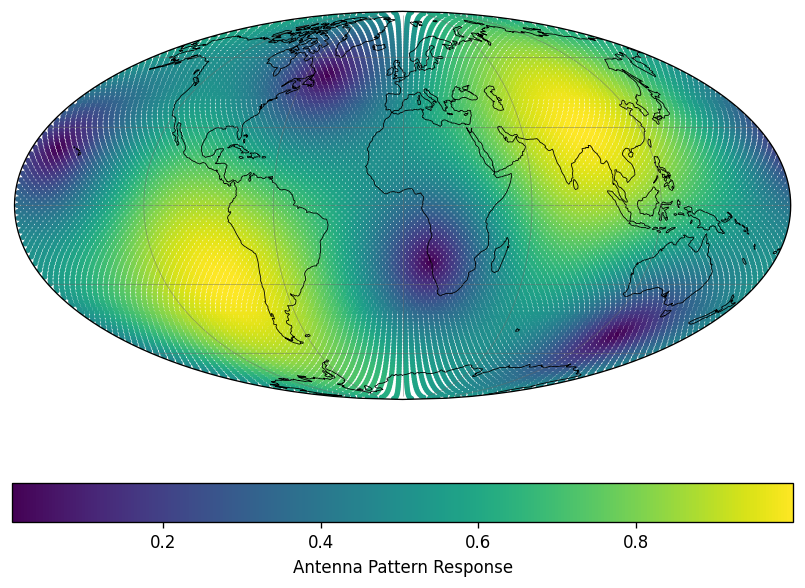

In [ ]:
def plot_antenna_pattern(theta_0, phi_0, alpha, psi, nside=32):
    """Plot the antenna pattern using a Mollweide projection."""
    npix = hp.nside2npix(nside)
    antenna_map = np.zeros(npix)

    for pix in range(npix):
        theta, phi = hp.pix2ang(nside, pix)
        antenna_map[pix] = antenna_pattern(theta, phi, psi, theta_0, phi_0, alpha)

    # Healpy pixel centers (convert to degrees for Cartopy)
    lon, lat = hp.pix2ang(nside, np.arange(npix), lonlat=True)
    lat = np.radians(lat)
    lon = np.radians(lon)

    fig = plt.figure(figsize=(12, 6), dpi=120)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

    # Plot antenna pattern
    sc = ax.scatter(lon * 180 / np.pi, lat * 180 / np.pi, c=antenna_map, cmap="viridis", s=5, transform=ccrs.PlateCarree())

    ax.coastlines(color='black', linewidth=0.5)
    ax.set_global()
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='dimgrey', alpha=0.5)

    cbar = fig.colorbar(sc, orientation="horizontal", shrink=0.7)
    cbar.set_label("Antenna Pattern Response")
    plt.show()

# 🌍 Detector location: LIGO Livingston
lat = 30.0
lon = -90.0
yangle = 160.0

# Convert to radians
theta_0 = np.radians(lon)
phi_0 = np.radians(lat)
alpha = np.radians(yangle - 90)
psi = 0

# Plot the antenna pattern
plot_antenna_pattern(theta_0, phi_0, alpha, psi)


Good job! You are almost at the end of the first part. Now, what can you tell me about the "blind" spots of the detector? Where are they located? Where is the best place to see a gravitational wave?

**Excersice 4:** What about other detectors? Can you remake this plot? See details below:

- _LIGO Hanford:_ lat = 46.45, lon = -119.41, yangle = 171.8

- _Virgo:_ lat = 43.63, lon = 10.5, yangle = 250.0

Plotting for LIGO Livingston


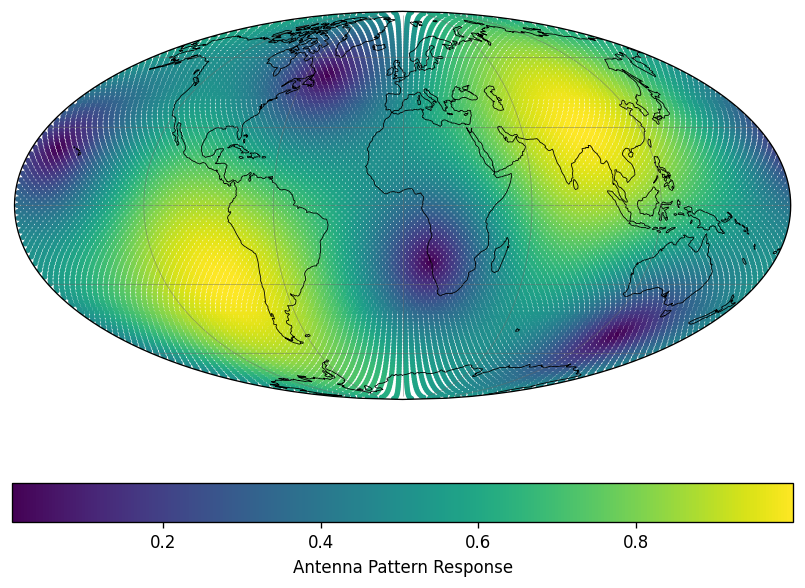

Plotting for LIGO Hanford


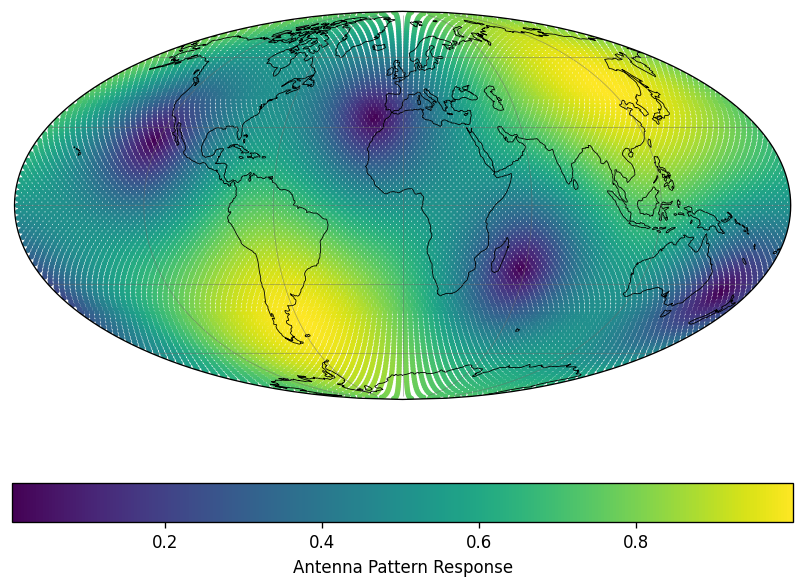

Plotting for Virgo


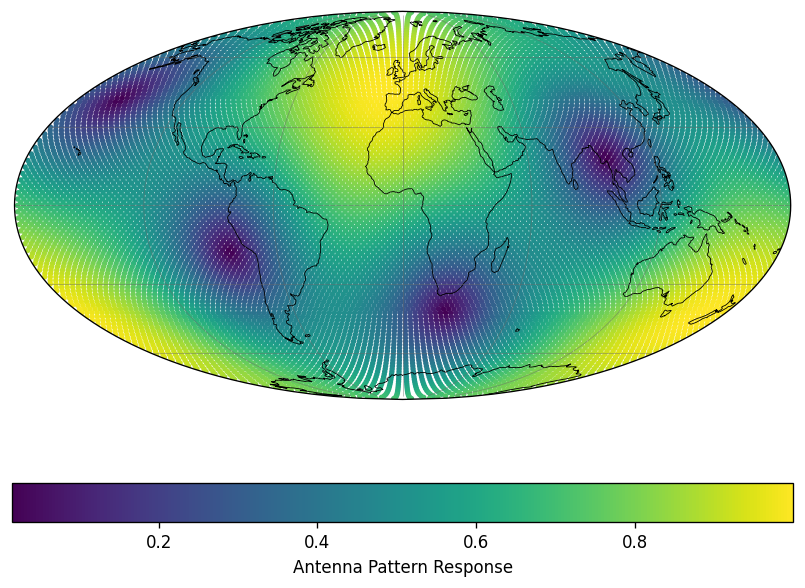

In [ ]:
def antenna_pattern(theta, phi, psi, theta0, phi0, alpha):
    """
    Compute the antenna pattern functions F_plus and F_cross.
    """
    def direction_propagation(theta, phi):
        return np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])

    k = direction_propagation(theta, phi)

    def polarization_tensors(theta, phi, psi):
        e_theta = np.array([
            np.cos(theta) * np.cos(phi),
            np.cos(theta) * np.sin(phi),
            -np.sin(theta)
        ])
        e_phi = np.array([-np.sin(phi), np.cos(phi), 0])

        e_plus = np.outer(e_theta, e_theta) - np.outer(e_phi, e_phi)
        e_cross = np.outer(e_theta, e_phi) + np.outer(e_phi, e_theta)

        e_plus_rot = np.cos(2 * psi) * e_plus - np.sin(2 * psi) * e_cross
        e_cross_rot = np.sin(2 * psi) * e_plus + np.cos(2 * psi) * e_cross

        return e_plus_rot, e_cross_rot

    e_plus, e_cross = polarization_tensors(theta, phi, psi)

    def rotation_matrix(theta0, phi0):
        Rz = np.array([
            [np.cos(np.pi / 2 + theta0), -np.sin(np.pi / 2 + theta0), 0],
            [np.sin(np.pi / 2 + theta0), np.cos(np.pi / 2 + theta0), 0],
            [0, 0, 1]
        ])

        Rx = np.array([
            [1, 0, 0],
            [0, np.cos(np.pi / 2 - phi0), -np.sin(np.pi / 2 - phi0)],
            [0, np.sin(np.pi / 2 - phi0), np.cos(np.pi / 2 - phi0)]
        ])

        return Rx @ Rz

    R = rotation_matrix(theta0, phi0)
    k_local = R @ k
    e_plus_local = R @ e_plus @ R.T
    e_cross_local = R @ e_cross @ R.T

    d_x = np.array([np.cos(alpha), np.sin(alpha), 0])
    d_y = np.array([-np.sin(alpha), np.cos(alpha), 0])

    F_plus = 0.5 * (np.dot(d_x, e_plus_local @ d_x) - np.dot(d_y, e_plus_local @ d_y))
    F_cross = 0.5 * (np.dot(d_x, e_cross_local @ d_x) - np.dot(d_y, e_cross_local @ d_y))

    return F_plus, F_cross

def plot_antenna_pattern(theta_0, phi_0, alpha, psi, nside=32):
    """
    Plot the antenna pattern using Cartopy with Mollweide projection.
    """
    npix = hp.nside2npix(nside)
    antenna_map = np.zeros(npix)

    for pix in range(npix):
        theta, phi = hp.pix2ang(nside, pix)
        F_plus, F_cross = antenna_pattern(theta, phi, psi, theta_0, phi_0, alpha)
        antenna_map[pix] = np.sqrt(F_plus**2 + F_cross**2)

    lon, lat = hp.pix2ang(nside, np.arange(npix), lonlat=True)

    fig = plt.figure(figsize=(12, 6), dpi=120)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

    pc = ax.scatter(lon, lat, c=antenna_map.ravel(), cmap="viridis", s=5, transform=ccrs.PlateCarree())
    ax.coastlines(color='black', linewidth=0.5)
    ax.set_global()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgrey', alpha=0.5)

    cbar = fig.colorbar(pc, orientation="horizontal", shrink=0.7)
    cbar.set_label("Antenna Pattern Response")
    plt.show()

# Detector details
for detector in [
    (30, -90, 160, "LIGO Livingston"),
    (46.45, -119.41, 171.8, "LIGO Hanford"),
    (43.63, 10.5, 250.0, "Virgo")
]:
    lat, lon, yangle, name = detector
    theta_0 = np.radians(lon)
    phi_0 = np.radians(lat)
    alpha = np.radians(yangle - 90)
    psi = 0

    print(f"Plotting for {name}")
    plot_antenna_pattern(theta_0, phi_0, alpha, psi)

Do you want a curiosity about the detection of the first binary neutron star? [Here](https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.png) is the sky map. Where is it located? What can Virgo see? Is it a good thing or a bad thing?